In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#reading the data
data = pd.read_csv('cumulative.csv')
data
data = data.sample(n = 2500)

In [13]:
#selecting important columns after comparing the correlation matrix coded below
xdata = data.drop(columns=['koi_disposition','koi_pdisposition', 'koi_tce_plnt_num', 'koi_tce_delivname', 'kepler_name', 'kepoi_name','koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'])

#cleaning the data
data = data.dropna(axis = "columns")
xdata = xdata.dropna(axis = "columns")
xdata

rowid     kepid  koi_fpflag_nt  ...         ra        dec  koi_kepmag
5283   5284  11825057              1  ...  296.96957  50.067093      18.852
4283   4284   5962262              0  ...  292.46387  41.299068      14.790
4485   4486   5651829              0  ...  299.46524  40.891090      13.308
3921   3922   7259249              0  ...  282.92773  42.806080      15.156
6682   6683   8300828              1  ...  292.22482  44.292770      14.981
...     ...       ...            ...  ...        ...        ...         ...
2890   2891   8197560              0  ...  300.97794  44.089069      16.695
8165   8166   7385478              0  ...  297.74109  42.996090      11.471
4653   4654   9777556              0  ...  294.64285  46.549412      16.072
4460   4461   6880517              0  ...  296.39752  42.396919      15.858
1321   1322   7951018              0  ...  288.43576  43.763489      15.182

[2500 rows x 12 columns]

In [14]:
#scaling the xdata
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xdata = pd.DataFrame(scaler.fit_transform(xdata), columns=xdata.columns, index=xdata.index)


In [15]:
#converting the dataframe to numpy array for the model
import numpy as np

ydata = data['koi_disposition']

ytest = np.asarray(ydata[2201:2500])
xtest = np.asarray(xdata[2201:2500]).astype(np.float64)
xtrain = np.asarray(xdata[0:2200]).astype(np.float64)
ytrain = np.asarray(ydata[0:2200])
ytrain

array(['FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [16]:
 xtrain.shape


(2200, 12)

In [17]:
 ytrain.shape

(2200,)

In [18]:
#converting the Ydata to a scale data where confirm:0 and false:2

from sklearn.preprocessing import OrdinalEncoder
cat_encoder = OrdinalEncoder(categories=[['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']]) 
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)
ytrain_em = cat_encoder.fit_transform(ytrain)
ytest_em = cat_encoder.fit_transform(ytest)
ytrain_em

array([[2.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

In [19]:
cat_encoder.categories_

[array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)]

In [20]:
###Performing coorelation between  xtrain and ytrain  

corr_pd1 = pd.DataFrame(xtrain)
corr_pd2 = pd.DataFrame(ytrain_em)
result = pd.concat([corr_pd1, corr_pd2], axis=1)
result.columns = ['rowid',	'kepid',	'koi_fpflag_nt','koi_fpflag_ss'	,'koi_fpflag_co',	'koi_fpflag_ec',	'koi_period',	'koi_time0bk', 'koi_duration'	,'ra'	,'dec',	'koi_kepmag','koi_disposition']
corr_matrix = result.corr()
corr_matrix["koi_disposition"].sort_values(ascending = False)

koi_disposition    1.000000
rowid              0.502975
koi_fpflag_co      0.422308
koi_fpflag_ss      0.417776
koi_fpflag_nt      0.416842
koi_fpflag_ec      0.314137
koi_duration       0.158742
koi_period         0.143340
ra                 0.118678
koi_time0bk        0.064020
koi_kepmag        -0.041695
dec               -0.086099
kepid             -0.090087
Name: koi_disposition, dtype: float64

In [21]:
#sgdclassifier
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(xtrain, ytrain_em)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
#Metrics
from sklearn.metrics import mean_squared_error, accuracy_score, explained_variance_score

ypred = model.predict(xtest)

#print(ypred)
print(mean_squared_error(ytest_em, ypred))
print(accuracy_score(ytest_em, ypred))
print(explained_variance_score(ytest_em,ypred))

0.15384615384615385
0.8561872909698997
0.7834346754313887


In [23]:
#implementing linear regession
from sklearn.linear_model import LinearRegression
model2 =  LinearRegression().fit(xtrain,ytrain_em)

ypred2 = model2.predict(xtest)

print(mean_squared_error(ytest_em, ypred2))


0.19504253479536598


In [24]:
#implementing another classifier

from sklearn.tree import DecisionTreeClassifier
tree_clas = DecisionTreeClassifier()
dis_class=tree_clas.fit(xtrain, ytrain_em)
dis_class
 
planet_predictions = tree_clas.predict(xtest)

mse = mean_squared_error(ytest_em, planet_predictions)
acc = accuracy_score(ytest_em, planet_predictions)
acc


0.8729096989966555

In [25]:
#crossvalidation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,xtrain,ytrain_em, scoring="accuracy", cv=3)
scored_sqrt = np.sqrt(scores)
scored_sqrt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.93011968, 0.93075392, 0.93294996])

In [26]:
from sklearn.model_selection import cross_val_predict
ytrain_em_pred = cross_val_predict(model, xtrain, ytrain_em, cv=3)
ytrain_em_pred = ytrain_em_pred.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(ytrain_em, ytrain_em_pred, average=None))
print(recall_score(ytrain_em, ytrain_em_pred, average=None))
print(f1_score(ytrain_em, ytrain_em_pred, average=None))

[0.69640063 0.79949239 0.98114824]
[0.84923664 0.61886051 0.98114824]
[0.76526225 0.69767442 0.98114824]


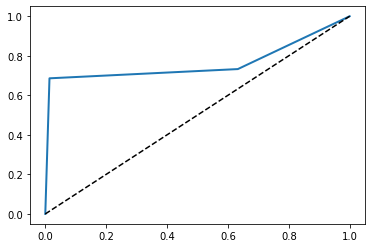

In [28]:
#roc curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytrain_em, ytrain_em_pred, pos_label=1)

def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  [...]

plot_roc_curve(tpr,fpr)
plt.show()